# Semantica Parte 1 - variables e obxectos en Python

* Vexamos agora a *semántica* de Python, é dicir, o significado das sentenzas.
* Empezaremos por *variables* e *obxectos*, que son unha das moitas maneiras nas que se almacenan, referencian e se opera con datos nun script de Python.

## En Python as variables son punteiros

Asignar variables en Python é tan sinxelo coma escribir o nome da variable ás esquerda dun signo igual (``=``):

```python
# asignar 4 á variable x
x = 4
```
Fíxate que non hai que declarar unha variable antes de asignala.

En moitas linguaxes,  **variables** = **"caixóns" de datos**. En FORTRAN, por exemplo, cando escribes 

```fortran
! código FORTRAN
integer x
x = 4
```
estás en esencia definindo un "caixón de memoria" chamado ``x``, e poñendo un valor enteiro ``4`` nel.

En **Python**, pola contra, as variables son **punteiros que referencian obxectos**. Se escribes

```python
x = 4
```
o que estás facendo é definir un *punteiro* chamado ``x`` que apunta a algún caixón que contén o valor ``4``. Por elo, non é necesario declarar esa variable.

Neste sentido é no que a xente di que Python é de *tipado dinámico*: os nomes de variables poden apuntar a obxectos de calquera tipo.

En Python, por exemplo, pódense facer cousas coma estas:

In [ ]:
x = 1         # x é un enteiro
x = 'ola'   # e agora unha cadea
x = [1, 2, 3] # e agora unha lista!

Seguramente quen use habitualmente linguaxes de *tipado estático* boten de menos a seguridade que proporcionan as declaracións, coma as de Fortran ou C. Este *tipado dinámico* é unha das características que fan de Python unha linguaxe tan rápida de escribir e fácil de ler.


### Perigos do modelo "variable como punteiro"

Se dúas variables apunta ó mesmo obxecto *mutable*, cambiar un deles tamén cambiará o outro!

Por exemplo, no caso das listas:

In [ ]:
x = [3, 2, 1]
y = x

Creamos dúas variables ``x`` e ``y`` que apunten ó mesmo obxecto.
Por este motivo, se cambiamos a lista mediante unha destas variables veremos como a outra variable tamén se modifica:

In [ ]:
print(y)

In [ ]:
x.append(4) # engadirlle 4 á lista á que apunta x
print(y) # a lista á que apunta y tamén cambiou!

Se pensamos que as variables non son máis que punteiros que apunta a obxectos, este comportamento non está falto de sentido.

Fíxate tamén que se asignamos outro valor a x mediante o signo "``=``", esto non afectará ó valor de ``y`` - a asignación é simplemente un cambio de a que obxecto a variable apunta:

In [ ]:
x = 'something else'
print(y)  # y non cambiou

x = [4, 5, 1]
print(y) # y non cambiou

De novo, esto terá sentido se pensamos que ``x`` e ``y`` son punteiros, e o operador "``=``" simplemente cambia a onde apunta o punteiro.


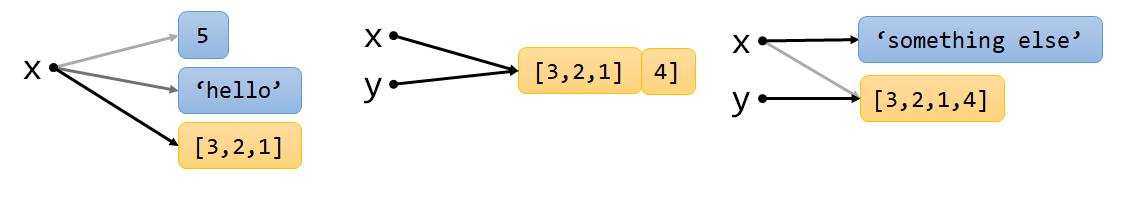

### Tipos Mutables vs. inmutables

Poidera parecer que esta idea dos punteiros fai que as operacións aritméticas sexan máis complicadas, pero en Python esto non é un problema. Os números, strings e outros *tipos simples* son inmutables: non se pode cambiar o seu valor, solo se pode cambiar a onde apuntan os punteiros.

Por exemplo, é perfectamente lícito facer operacións coma as seguintes:

In [ ]:
x = 10
y = x
x = x + 5  # engade 5 ó valor de  x, e asígnallo a x outra vez
print("x =", x)
print("y =", y)

Cando facemos ``x = x + 5``, non estamos modificando o valor do obxecto ``5`` ó que apunta ``x``, senón que estamos cambiando a que obxecto apunta ``x``.
Por este motivo o valor de ``y`` non se ve afectado.

### `copy()`

Cando precises modificar un obxecto, ás veces pode ser conveniente facer unha copia, ainda que na práctica isto faise moi raramente, xa que é moi ineficiente.

In [ ]:
x = [3, 2, 1, 5]
y = x.copy()
y.append(5)
print("x =", x)
print("y =", y)

O máis das veces o que realmente queremos é que a variable modificada sexa unha nova variable, en vez dunha copia. Neste exemplo queríamos unha lista ordenada.

In [ ]:
z = sorted(y)
print("z =", z)
print("y =", y)

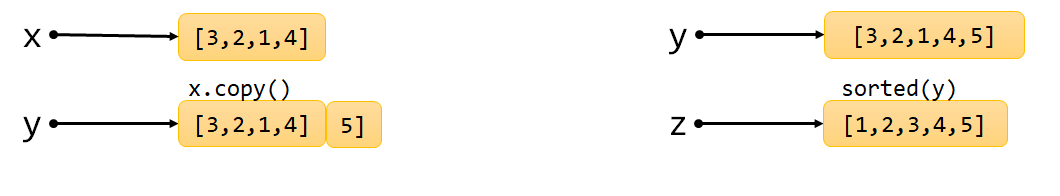

## Todo é un obxecto

Python é unha linguaxe orientada a obxectos (OOP), e en Python todo é un obxecto.

En linguaxes OOP un *obxecto* é unha entidade que contén datos xunto con metadatos e funcionalidade asociada.

En Python todo é un obxecto, e esto significa que **calquera entidade** tén algún metadato (chamado **atributo**) e funcionalidade asociada (chamada **métodos**).
Estes atributos e métodos son accesibles mediante **sintaxe de punto**.

Por exemplo, anteriormente vimos que as listas teñen un método ``append``, que engade elementos á lista, que é accesible mediante un punto ("``.``"):

In [ ]:
L = [1, 2, 3]
L.append(100)
print(L)


Que obxectos complexos coma as listas teñan atributos e métodos pode ser algo esperable. O que xa pode ser máis sorprendente é que en python obxectos simples tamén os teñan.
Por exemplo, os tipos numéricos teñen un atributo ``real`` e ``imag`` que contén a parte real e imaxinaria do número (pensado coma un número complexo):

In [ ]:
x = 4.5
print(x.real, "+", x.imag, 'i')

Os métodos son coma os atributos, só que son funcións que se poden chamar usando parénteses.
Por exemplo, os floats teñen un método chamado ``is_integer`` que comproba se o valor é enteiro ou non:

In [ ]:
x = 4.5
x.is_integer()

In [ ]:
x = 4.0
x.is_integer()

Cando dicimos que todo en Python é un obxecto quérese dicir *absolutamente* todo. Incluso os atributos e métodos dos obxectos son obxectos:

In [ ]:
type(x.is_integer)

Como veremos, o principio de "todo é un obxecto" permite algunhas construccións moi cómodas.

## Tipos de variables predefinidos

<center>   <b>Tipos escalares de Python ou Tipos simples </b>  </center>

| Tipo        | Exemplo        | Descrición                                                  |
|-------------|----------------|--------------------------------------------------------------|
| ``int``     | ``x = 1``      | integers (i.e., números enteiros)                            |
| ``float``   | ``x = 1.0``    | floating-point numbers (i.e., números reais)                 |
| ``complex`` | ``x = 1 + 2j`` | Complex numbers (i.e., números con parte real e imaxinaria ) |
| ``bool``    | ``x = True``   | Boolean: valores True/False                                  |
| ``str``     | ``x = 'abc'``  | String: caracteres ou texto                                  |
| ``NoneType``| ``x = None``   | Obxecto epecial que indica nulls                             |



<br/>
<br/>



<center> <b> Estruturas de datos </b></center>

|Nome do Tipo| Exemplo                   |Descrición                               |
|------------|---------------------------|-----------------------------------------|
|  ``list``  | ``[1, 2, 3]``             | Conxunto ordenado                       |
|  ``tuple`` | ``(1, 2, 3)``             | Conxunto ordenado inmutable             |
|  ``dict``  | ``{'a':1, 'b':2, 'c':3}`` | Asociación (clave,valor) non ordenada   |
|  ``set``   | ``{1, 2, 3}``             | Conxunto non ordenado de valores únicos |

Fíxate que os corchetes, parénteses e chaves teñen todos distintos significados.

Veremos todos estes tipos con detalle máis adiante no curso.


In [ ]:
a = ['a', 'b', 'c', 'd', 'e', 'f', 3.141592]
a[3]

In [ ]:
a = ('a','b','c')
a[2]

In [ ]:
a[2] = 5

In [ ]:
x = 3.
a = {'a':1,'b':2,'c':x.is_integer}
a['c']

In [ ]:
a = {1,2,3,'a'}

## Referencias
*A Whirlwind Tour of Python* by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1


# Semantica Parte 2: operadores

## Operacións Aritméticas

Vimos en códigos anteriores que se poden realizar distintas operacións aritméticas en Python. Pódese ver un compendio na seguinte táboa:

| Operador     | Nome           | Descrición                                                   |
|--------------|----------------|--------------------------------------------------------------|
| ``a + b``    | Suma           | suma de ``a`` e``b``                                         |
| ``a - b``    | Resta          | Diferencia de ``a`` e ``b``                                  |
| ``a * b``    | Multiplicación | Producto de ``a`` e ``b``                                    |
| ``a / b``    | División real  | Cociente de ``a`` e ``b``                                    |
| ``a // b``   | División enteira  | Cociente de ``a`` e ``b`` eliminando a parte fraccionaria |
| ``a % b``    | Modulo         | Resto enteiro da división de ``a`` por ``b``                 |
| ``a ** b``   | Exponenciación | ``a`` elevado á potencia ``b``                               |
| ``-a``       | Oposto         | Oposto do valor ``a``                                        |
| ``+a``       | Máis Unario    | ``a`` sen cambiar (apenas usado)                             |

In [ ]:
# suma, diferencia, multiplicación
(4 + 8) * (6 - 3)

In [ ]:
# división "verdadeira"
print(11 / 2)

In [ ]:
# division "truncada"
print(11 // 2)

O operador de división enteira foi engadido en Python 3; Se estás afeito a Python 2, ten en conta que a división ordinaria en python 2 (``/``) actúa como división enteira pra enteiros e división real pra floats.

En Python 3.5 engadiuse un operador ``a @ b`` que realiza o *produto matricial* de a e b.

## Operacións de asignación
Xa vimos que para asignar variables empregamos o operador "``=``", que garda o valor nesas variables para uso posterior. Por exemplo:

In [ ]:
a = 24
print(a)

Estas variables pódense usar en expresións cos operadores mencionados anteriormente. Por exemplo, para engadir 2 a ``a`` escribimos:

In [ ]:
a + 2

In [ ]:
print(a) # Fíxate que o valor de a non cambiou (non fixemos ningunha asignación)

* Se o que queremos é actualizar o valor de a con este novo valor podemos facer ``a = a + 2``.
* Pero python inclúe un operador de actualización para tódalas operacións aritméticas:

In [ ]:
a += 2  # equivalente a a = a + 2
print(a)

### Operador de asignación aumentada 
|||||
|-|-|-|-|
|``a += b``| ``a -= b``|``a *= b``| ``a /= b``|
|``a //= b``| ``a %= b``|``a **= b``|``a &= b``|
|<code>a &#124;= b</code>| ``a ^= b``|``a <<= b``| ``a >>= b``|

Para calquera operador "``■``", a expresión ``a ■= b`` é equivalente a ``a = a ■ b``.

#### Unha trampa:
Para obxectos mutables coma listas, arrays ou DataFrames, estes operadores de asignación aumentada son lixeiramente distintos: modifican os contidos do obxecto orixinal en vez de crear un novo obxecto para almacenar o resultado.

## Operadores de comparación

Outro tipo de operación que será de gran utilidade é a comparación de distintos valores.
Para isto python implementa comparacións estándar que devolven valores Booleanos ``True`` e ``False``.

| Operación     | Descrición                        | Operación     | Descrición                           |
|---------------|-----------------------------------|---------------|--------------------------------------|
| ``a == b``    | ``a`` igual que ``b``             | ``a != b``    | ``a`` distinto que ``b``             |
| ``a < b``     | ``a`` menor que ``b``             | ``a > b``     | ``a`` maior que  ``b``             |
| ``a <= b``    | ``a`` menor ou igual que  ``b``   | ``a >= b``    | ``a`` maior ou igual que ``b`` |

In [ ]:
# 25 é impar
25 % 2 == 1

In [ ]:
# 66 é par
66 % 2 == 1

Pódense encadear varias comparacións para comprobar relacións máis complexas:

In [ ]:
# mira se a está entre 25 e 30
a = 25
15 < a < 30

## Operacións booleanas
* Existen operadores en Python para combinar valores booleanos usando os coñecidos "and", "or", e "not".
* Chámanse literalmente "and", "or", e "not".

In [ ]:
x = 4
(x < 6) and (x > 2)

In [ ]:
(x > 10) or (x % 2 == 0)     

In [ ]:
not (x < 6)

Volveremos ás operacións booleanas na sección de **control de fluxo** .

### Operadores booleanos vs operators de bits

Cando usaremos operadores booleanos (``and``, ``or``, ``not``), e cando os operadores de bits (``&``, ``|``, ``~``)?

* Operadores booleanos: cando se calculen *valores booleanos (é dicir, verdadeiro ou falso) de sentenzas completas*.
* Operadores de bits: cando se estea *operando en bits individuais ou compoñentes dos obxectos en cuestión*.

## Operadores de identidade e pertenza

Igual que ``and``, ``or``, e ``not``, python tamén tén operadores para comprobar identidade e pertenza. Son os seguintes:

| Operator      | Description                                       |
|---------------|---------------------------------------------------|
| ``a is b``    | True se ``a`` e ``b`` son obxectos idénticos      |
| ``a is not b``| True se ``a`` e ``b`` non son obxectos idénticos  |
| ``a in b``    | True se ``a`` pertence a  ``b``                   |
| ``a not in b``| True se ``a`` non pertence a ``b``                |

### Operadores de identidade: "``is``"e "``is not``"

Os operadore "``is``" e "``is not``" comproban se os *obxectos son idénticos*.
Que dous obxectos sexan idénticos non é o mesmo que que sexan iguais, como podemos ver aquí:

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]

In [ ]:
a == b

In [ ]:
a is b

In [ ]:
a is not b

Como son os obxectos idénticos? Aquí vai un exemplo:

In [ ]:
a = [1, 2, 3]
b = a
a is b

* No primeiro caso: ``a`` e ``b`` apuntan a *diferentes obxectos* que resultan ser iguais
* Segundo caso: apuntan ó *mesmo obxecto*

Tal como vimos na sección anterior, as variables en Python son punteiros. O operador "``is``" comproba se as dúas variables apunta ó mesmo obxecto, en vez de comprobar que os obxectos ós que apuntan son iguais.

Poderache pasar que uses "``is``" cando o que tés que usar é ``==``.

## Operadores de pertenza
Os operadores de pertenza comproban se un obxecto está contido nun obxecto composto.
Por exemplo:

In [ ]:
1 in [1, 2, 3]

In [ ]:
4 in [1, 2, 3]

In [ ]:
2 not in [1, 2, 3]

In [ ]:
4 not in [1, 2, 3]

In [ ]:
"bc" in "abcd"

* Estes operadores de pertenza son un exemplo de por que python é tan doado de usar comparado con linguaxes de máis baixo nivel coma Fortran ou C.

* En Fortran, para determinar a pertenza a un conxunto habería que construir manualmente un bucle sobre o conxunto comprobando a igualdade de cada un dos valores.

* En Python só hai que teclear o que che fai falta.

## Referencias
*A Whirlwind Tour of Python* by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1